In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""time and wavelength arrays"""
#create time array  
time = np.arange(0, 5000, 1)

#create wavelength array
nm = np.arange(850, 1600, 1)

In [3]:
"""define gaussian parameters"""
#intensity of the gaussian, 
#this is arbitrary but when there're 2 and more gaussians
#in the model, the intensity of each gaussian describes 
#its weight
a1 = 1

#center and FWHM of the gaussian 
x0_1 = 950
sigma_1 = 30

#life-time of the gaussian
tau1 = 10

#create a second gaussian
a2 = 0.3
x0_2 = 1300
sigma_2 = 100
tau2 = 5000

#create a third gaussian
a3 = 0.5
x0_3 = 1100
sigma_3 = 60
tau3 = 2000



In [4]:
#one gaussian
def gaussian(nm, a, x0, sigma):
    """
    gaussian function
    """
    gaussian_array = a * np.exp(- ((nm - x0) ** 2.0) / (2 * (sigma ** 2.0))) 
    
    return gaussian_array

In [5]:
#generate a gaussian model
species_1 = gaussian(nm, a1, x0_1, sigma_1)

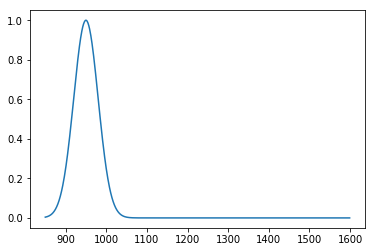

In [6]:
plt.plot(nm,species_1)

In [7]:
#monoexponential
def monoexp(t, tau):
    """
    mono-exponential function
    
    Args:
        t: time array
        tau: life-time
    
    """
    exp_array = np.exp(- (1.0/tau) * t)
    
    return exp_array
    

In [8]:
#generate an array of time-coefficients
#describing a mono-exponential decay with a given lifetime 
time_coeff_1 = monoexp(time, tau1)
time_coeff_1

array([1.00000000e+000, 9.04837418e-001, 8.18730753e-001, ...,
       9.61717221e-218, 8.70197727e-218, 7.87387465e-218])

In [9]:
#generate a data matrix that contains a gaussian model at each
#time and decays mono-exponentially
def data_matrix(nm_array, time_coeff_array, spectrum):
    """
    generates a two-way data matrix based on a known 
    spectrum and the spectrum's decay
    
    Args:
        nm_array: wavelength array
        time_coeff_array: an array that describes the decay
        spectrum: an array of the spectrum
    
    Returns:
        data_matrix: a matrix that contains the spectrum at each time
    """
    
    data_matrix = np.empty((np.shape(nm_array)[0], np.shape(time_coeff_array)[0]))
    for i in range(np.shape(time_coeff_array)[0]):
        data_matrix[:, i] = time_coeff_array[i] * spectrum
    
    return data_matrix

In [10]:
data_matrix_1 = data_matrix(nm, time_coeff_1, species_1)

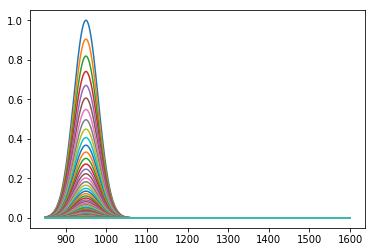

In [11]:
for i in range(5000):
    plt.plot(nm,data_matrix_1[:,i])

In [12]:
#generate a second data matrix that contains a gaussian model
#at each time and decays mono-exponentially
species_2 = gaussian(nm, a2, x0_2, sigma_2)
time_coeff_2 = monoexp(time, tau2)
data_matrix_2 = data_matrix(nm, time_coeff_2, species_2)

#generate a third data matrix that contains a gaussian model
#at each time and decays mono-exponentially
species_3 = gaussian(nm, a3, x0_3, sigma_3)
time_coeff_3 = monoexp(time, tau3)
data_matrix_3 = data_matrix(nm, time_coeff_3, species_3)



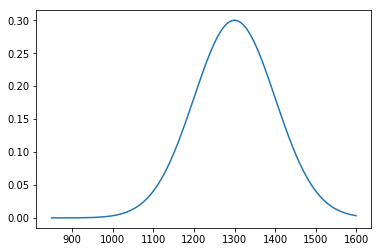

In [13]:
plt.plot(nm,species_2)

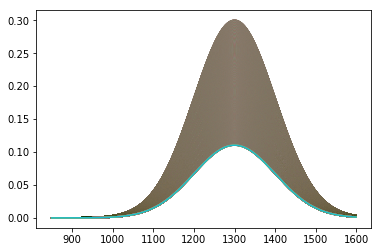

In [14]:
# generate a second data matrix plot
for i in range(5000):
    plt.plot(nm,data_matrix_2[:,i])

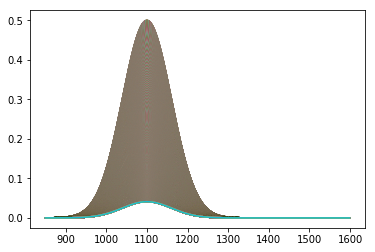

In [15]:
# generate a third data matrix plot
for i in range(5000):
    plt.plot(nm,data_matrix_3[:,i])

In [16]:
#generate a three-gaussian mixture model by adding three gaussians above
data_matrix_0 = data_matrix_1 + data_matrix_2+ data_matrix_3

In [17]:
data_matrix_0

array([[3.96286807e-03, 3.59493227e-03, 3.26200594e-03, ...,
        1.14062210e-05, 1.14018462e-05, 1.13974733e-05],
       [4.42143531e-03, 4.01049049e-03, 3.63864770e-03, ...,
        1.21106758e-05, 1.21060099e-05, 1.21013460e-05],
       [4.92791018e-03, 4.46943846e-03, 4.05459122e-03, ...,
        1.28577278e-05, 1.28527520e-05, 1.28477785e-05],
       ...,
       [3.64491292e-03, 3.64418401e-03, 3.64345525e-03, ...,
        1.34169330e-03, 1.34142499e-03, 1.34115673e-03],
       [3.53807387e-03, 3.53736633e-03, 3.53665892e-03, ...,
        1.30236582e-03, 1.30210538e-03, 1.30184498e-03],
       [3.43402305e-03, 3.43333631e-03, 3.43264972e-03, ...,
        1.26406469e-03, 1.26381190e-03, 1.26355917e-03]])

In [18]:
data_matrix_0.shape

(750, 5000)

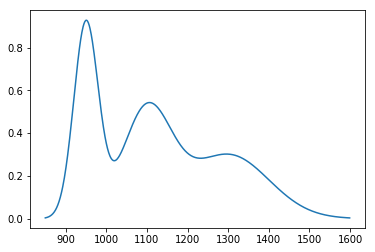

In [19]:
#generate a three-gaussian mixture model plot of the first column
plt.plot(nm,data_matrix_0[:,1])

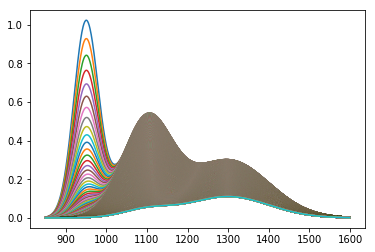

In [20]:
#generate a three-gaussian mixture model plot of all columns
for i in range(5000):
    plt.plot(nm,data_matrix_0[:,i])

In [21]:
def spectral_shift(start_nm, end_nm, time):
    """
    generates a linear spectral shift
    
    Args:
        start_nm: the starting peak position
        end_nm: the ending peak position
        time: an array of time
    
    Returns:
        an array of peak position within the given time
    
    """
    
    #calculate the step of peak shift at each time interval 
    #the peak shift is linear
    step = float((end_nm - start_nm)) / (len(time))
    
    x0 = np.arange(start_nm, end_nm, step)

    return x0

In [22]:
#generate an array of peak positions that shifts from 1200 to 1300
#within a time array
x0_1_shift = spectral_shift(1200, 1300, time)

In [23]:
def gaussian_shift(nm, a, x0_shiftarray, sigma):
    """
    generates a matrix that contains a gaussian model that spectrally shifts
    
    Args:
        nm: wavelength array
        a: intensity of the gaussian
        x0_shiftarray: an array of peak positions
        sigma: gaussian FWHM
    
    Returns
        a matrix that contains gaussian function that contains spectral shift
    
    """
    
    gaussian_matrix = np.empty((len(nm), len(x0_shiftarray)))
    for i in range(len(x0_shiftarray)):
        gaussian_matrix[:, i] = a * np.exp(- ((nm - x0_shiftarray[i]) ** 2.0) / (2 * (sigma ** 2.0)))
        
    return gaussian_matrix



In [24]:
#generates a matrix that contains a gaussian at each time with a shift
#in peak position
species_1_matrix = gaussian_shift(nm, a1, x0_1_shift, sigma_1)


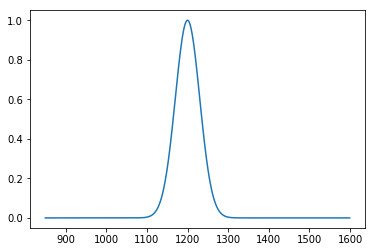

In [25]:
#generates a matrix that contains a gaussian at each time with a shift at the first column
plt.plot(nm,species_1_matrix[:,0])

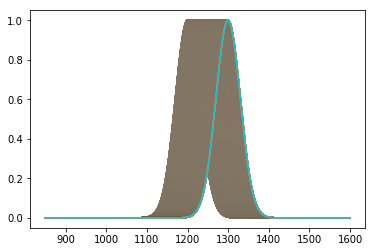

In [26]:
#generates a matrix that contains a gaussian at each time with a shift at all columns
for i in range(5000):
    plt.plot(nm,species_1_matrix[:,i])

In [27]:
def data_matrix_spectralshift(nm, time_coeff_array, spectrum_matrix):
    """
    generates a matrix that contains a gaussian model with a known decay
    
    Args:
        nm_array: wavelength array
        time_coeff_array: array of time coefficients that 
            describes the kinetics
        spectrum_matrix: a matrix that contains gaussian function at each time
    
    Returns:
        a matrix that contains gaussian function that evolves in time
        
    """
    data_matrix = np.empty((np.shape(nm)[0], np.shape(time_coeff_array)[0]))
    for i in range(np.shape(time_coeff_array)[0]):
        data_matrix[:, i] = time_coeff_array[i] * spectrum_matrix[:, i]
    
    return data_matrix

In [28]:
#generates a matrix that contains a gaussian at each time with a peak
#shift and monoexponential decay
data_1_matrix_shift = data_matrix_spectralshift(nm, time_coeff_1, species_1_matrix)

In [29]:
data_1_matrix_shift

array([[2.77873902e-030, 2.49482662e-030, 2.23992143e-030, ...,
        1.37387160e-266, 1.23076244e-266, 1.10255974e-266],
       [4.09730962e-030, 3.67875651e-030, 3.30295845e-030, ...,
        2.26372235e-266, 2.02796707e-266, 1.81676371e-266],
       [6.03486081e-030, 5.41850114e-030, 4.86509009e-030, ...,
        3.72578356e-266, 3.33783615e-266, 2.99028245e-266],
       ...,
       [9.39580273e-039, 8.57700746e-039, 7.82956245e-039, ...,
        4.91865552e-239, 4.48005954e-239, 4.08057130e-239],
       [6.04116216e-039, 5.51482889e-039, 5.03434991e-039, ...,
        3.53393861e-239, 3.21888922e-239, 2.93192506e-239],
       [3.87993588e-039, 3.54197709e-039, 3.23345450e-039, ...,
        2.53623239e-239, 2.31017950e-239, 2.10427363e-239]])

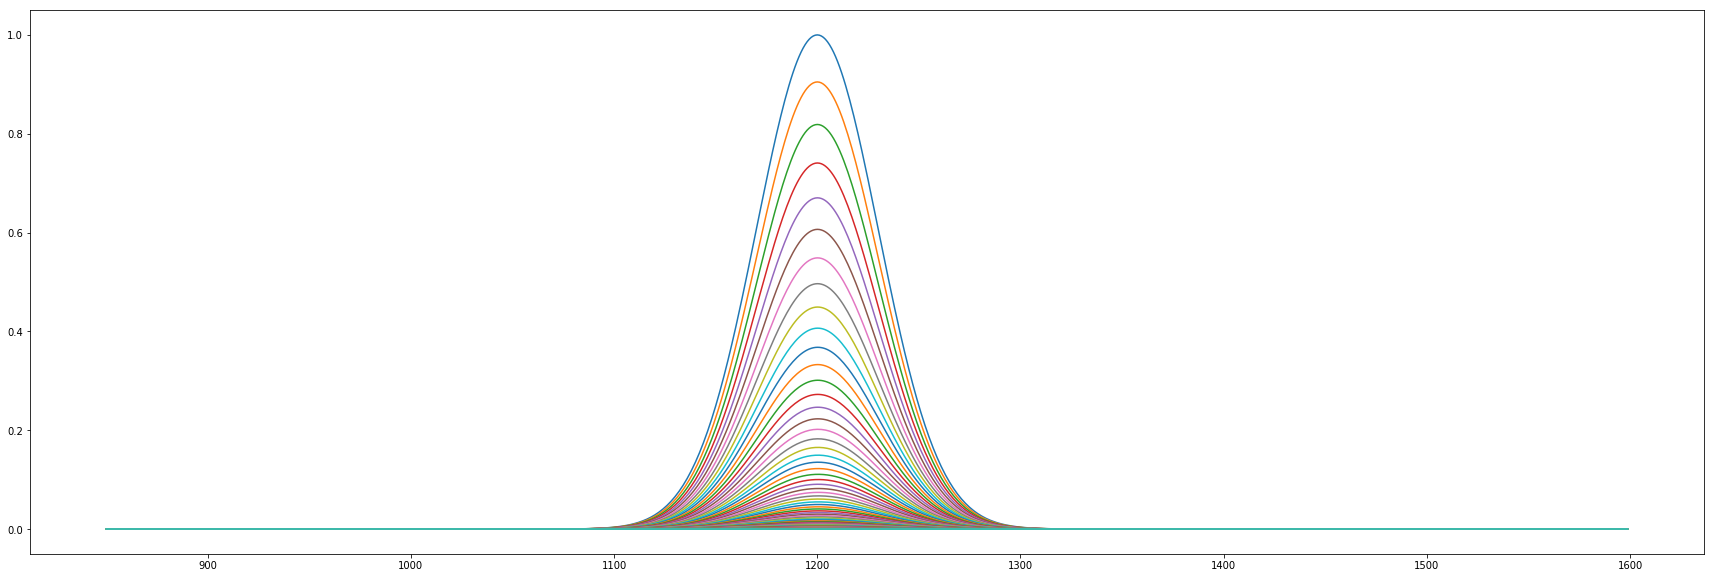

In [30]:
#generates a matrix that contains a gaussian at each time with a peak shift and monoexponential decay plot
plt.figure(figsize=(30,10))
for i in range(1000):
    plt.plot(nm,data_1_matrix_shift[:,i])

In [31]:
def find_nearest(array,value):
    """
    find the nearest value to a given value
    Returns:
        the index of the nearest value in the array
    """
    idx = (np.abs(array-value)).argmin()
    return idx

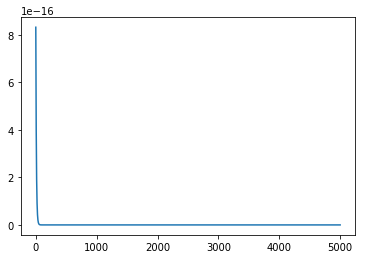

In [32]:
#plot the peak shift over time
plt.figure()
plt.plot(time, data_1_matrix_shift[find_nearest(nm, 950), :])

In [33]:
data_1_matrix_shift[find_nearest(nm, 950), :]

array([8.32396968e-016, 7.49011003e-016, 6.73977988e-016, ...,
       2.73544396e-247, 2.45595842e-247, 2.20502748e-247])

In [34]:
#generate three gaussian mixture with spectral evolution
#by adding one gaussian that contains spectral shift and two without 
#spetral shift
data_matrix = data_1_matrix_shift + data_matrix_2 + data_matrix_3

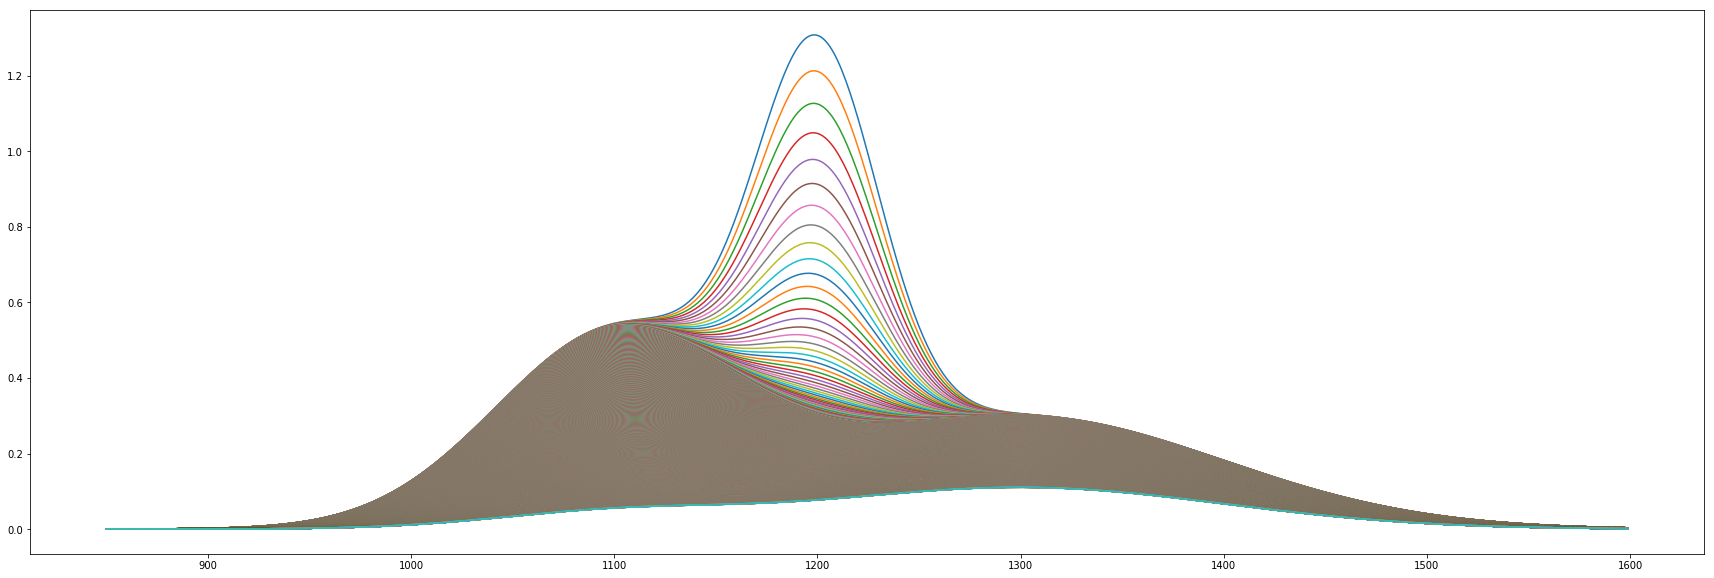

In [35]:
plt.figure(figsize=(30,10))
for i in range(5000):
    plt.plot(nm,data_matrix[:,i])

In [36]:
def twodcontourplot(tadata_nm, tadata_timedelay, tadata_z_corr):
    """
    make contour plot
    
    Args:
        tadata_nm: wavelength array
        tadata_timedelay: time delay array
        tadata_z_corr: matrix of z values
        
    """
    nm, timedelay = np.linspace(tadata_nm.min(), tadata_nm.max(), 100), np.linspace(tadata_timedelay.min(), tadata_timedelay.max(), 100)    
    timedelayi, nmi = np.meshgrid(tadata_timedelay, tadata_nm)

    #find the maximum and minimum
    #these are used for color bar
    z_min = np.amin(np.amin(tadata_z_corr, axis = 1))
    z_max = np.amax(np.amax(tadata_z_corr, axis = 1))

    return [nmi, timedelayi, z_min, z_max]

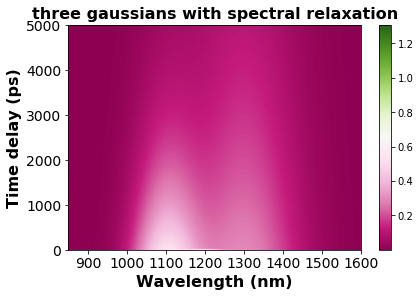

In [37]:
"""make 2d contour plot"""

plt.figure()
#plt.xlim(450,800)
plt.title('three gaussians with spectral relaxation', fontsize = 16, fontweight = 'bold')
#plt.ylim(0,50)
plt.xlabel('Wavelength (nm)', fontsize = 16, fontweight = 'bold')
plt.ylabel('Time delay (ps)', fontsize = 16, fontweight = 'bold')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
nmi_9, timedelayi_9, z_min_9, z_max_9 = twodcontourplot(nm, time, data_matrix)
plt.pcolormesh(nmi_9, timedelayi_9, data_matrix, cmap = 'PiYG', vmin=z_min_9, vmax=z_max_9)
plt.colorbar()
plt.tight_layout(pad=0.25, h_pad=None, w_pad=None, rect=None)

In [38]:
"""output data"""
#1st columns: wavelength
#1st rows: time
output = np.empty((np.shape(data_matrix)[0]+1, np.shape(data_matrix)[1]+1))
output[1:, 1:] = data_matrix
output[0, 1:] = time
output[1:, 0] = nm
outfile = np.savetxt('threegaussian_spectralshfit.txt', output, fmt='%.3e', delimiter='\t')